In [160]:
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  #load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [161]:
# get the stock quote of a corporation (Apple Inc.)
# df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2021-12-17')
df = pd.read_csv('../data_input/Tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [162]:
# get the number of rows and columns in the data set
df.shape

(1692, 7)

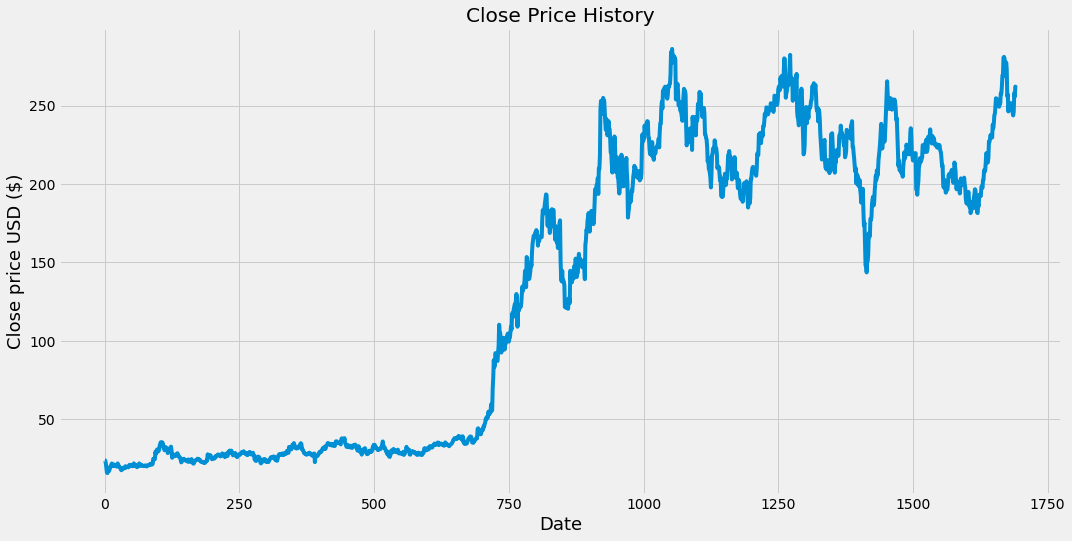

In [163]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [164]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1354

In [165]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [166]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

2780345008, 0.047439315323587035, 0.04514505474280087, 0.04421995116200577, 0.04477501331048283, 0.0435538765838333, 0.044293959448469374, 0.04477501331048283, 0.0472542909070137, 0.047032266047622874, 0.047846357198722565, 0.04721728306336757, 0.0454410878886553, 0.04407193088866423, 0.04188869383881643, 0.04111160313053424, 0.042369744000415564, 0.04373890100040664, 0.04599615003713236, 0.04607015832359596, 0.025865899819445308, 0.03996447469034831, 0.040741557997801874, 0.04055654098205718, 0.03996447469034831, 0.040593545125288975, 0.04299881443535624, 0.04503403861269114, 0.048623447907004756, 0.05006660579263079, 0.050954705230194096, 0.04910449806860389, 0.05099170937342589, 0.05347098696995677, 0.05680135986081913, 0.059206625470472056, 0.05846654630625032, 0.059687683032899834, 0.06209295974379574, 0.05661633914466011, 0.05805950073070045, 0.06427618939281488, 0.06586736755178246, 0.06801361526005575, 0.07093694627578259, 0.06919774784347346, 0.0681616355333973, 0.069308756572

In [167]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [168]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1294, 60, 1)

In [169]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [170]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [171]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('../out/APPL_LSTM_1.h5')

1294/1294 [==============================] - 68s 48ms/step - loss: 0.0047


In [172]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [173]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [174]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [175]:
# get the models predicted price values
# model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [176]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.854012938311877

<ipython-input-177-dc49c41f9a97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


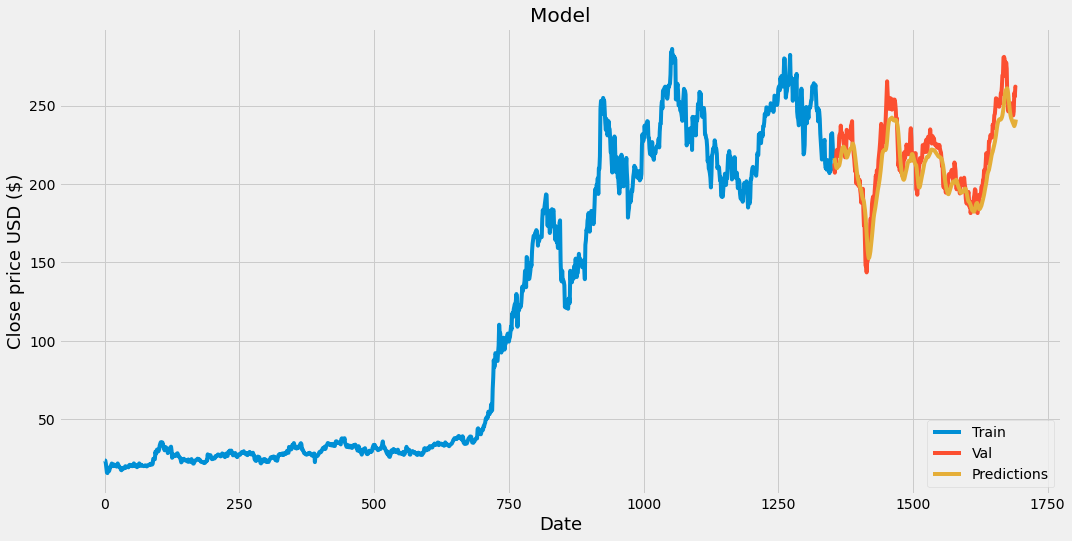

In [177]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [178]:
# show the valid and predicted prices
valid

,Close,Predictions
1354,212.940002,216.535736
1355,207.190002,215.427399
1356,214.309998,213.307343
1357,214.000000,211.632751
1358,221.070007,210.319550
...,...,...
1687,246.169998,237.484833
1688,258.000000,236.875153
1689,255.729996,237.743500
1690,262.049988,239.027191


In [179]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
valid.to_csv('../out/Tesla_LSTM_1.csv')
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,216.535736
2015-11-13,207.190002,215.427399
2015-11-16,214.309998,213.307343
2015-11-17,214.000000,211.632751
2015-11-18,221.070007,210.319550
...,...,...
2017-03-13,246.169998,237.484833
2017-03-14,258.000000,236.875153
2017-03-15,255.729996,237.743500


In [180]:
# ## predict stock price of Apple for 18/12/2019
# # create a new df get teh last 60 days closing price values and convert the df to an array
# last_60_days = data[-60:].values
# # scale the data to be values betweeen 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # create an empty list
# X_test = [] 
# # append teh past 60 days
# X_test.append(last_60_days_scaled)
# # convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# # reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# # get the predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [181]:
# # get the quote 18/12/2019
# val = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
# val['Close']